# Notebook for checking dt dependence of simulation

In [3]:
from cells_simulation import *




## Cecking dt dependence 

| ==================== | Progress 100%  No of cells:  100
| ==================== | Progress 100%  No of cells:  100
| ==================== | Progress 100%  No of cells:  100
| ==================== | Progress 100%  No of cells:  100


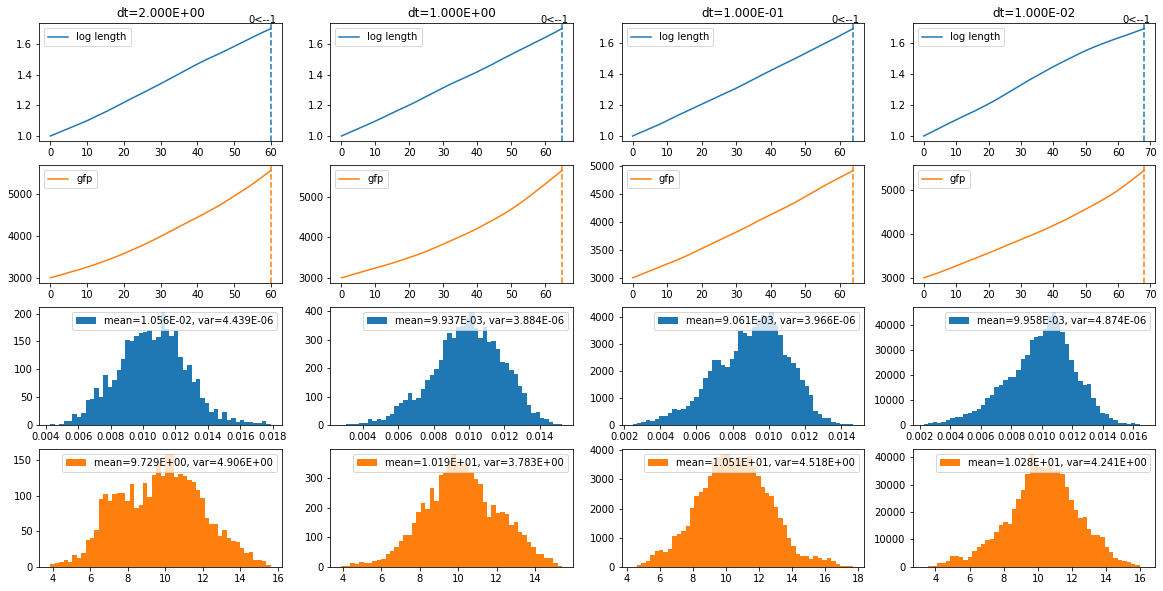

In [13]:
div_mode = "sizer"
division_log_length = 1+np.log(2)

# ========== Model parameters ========== #
parameter_set = {   "mean_lambda": 0.01, 
                    "gamma_lambda": 0.01,
                    "var_lambda": 1e-7,
                    "mean_q": 10,
                    "gamma_q": 1e-2,
                    "var_q": 0.1,
                    "beta": 0.001, #1e-3,
                    "var_x": 1e-3,
                    "var_g": 5000,
                    "var_dx": 0.001,
                    "var_dg": 50}

n_cells = 100
dt_list = [2, 1,0.1, 0.01]

fig, ax = plt.subplots(4,len(dt_list), figsize=(20,10))

for i, dt in enumerate(dt_list):
    cell_list = simulate_cells(dt, n_cells, parameter_set, div_mode, division_log_length)

    for j in range(1):
        cell = cell_list[j]
        cell.time = np.array(cell.time)
        cell_list.append(copy.deepcopy(cell))

        ax[0,i].set_title("dt={:.3E}".format(dt))
        ax[0,i].text(cell.time[-1]*0.9, cell.log_length[-1]*1.02, '{:d}<-{:d}'.format(cell.cell_id, cell.parent_id))

        ax[0,i].axvline(cell.time[-1], ls='--', color='tab:blue')
        ax[1,i].axvline(cell.time[-1], ls='--', color='tab:orange')

        if j ==0:
            label_len = 'log length'
            label_gfp = 'gfp'
        else:
            label_len = None
            label_gfp = None

        ax[0,i].plot(cell.time, np.array(cell.log_length), label=label_len, color='tab:blue')
        ax[1,i].plot(cell.time, np.array(cell.gfp), label=label_gfp, color='tab:orange')

    lts = []
    qts = []
    for cell in cell_list:
        lts += cell.lt
        qts += cell.qt

    ax[2,i].hist(lts, color='tab:blue', bins=50, label = 'mean={:.3E}, var={:.3E}'.format(np.mean(lts), np.var(lts)))
    ax[3,i].hist(qts, color='tab:orange', bins=50, label = 'mean={:.3E}, var={:.3E}'.format(np.mean(qts), np.var(qts)))

    for j in range(np.shape(ax)[0]):
        ax[j,i].legend()

plt.show()